In [2]:
from utils import get_paper_ref
from operator import itemgetter
from collections import Counter
# import sys
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install numpy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
name_id_pairs = {
    "steve_blackburn": {"id": 2146610949, "type":"author"},
    "kathryn_mckinley": {"id": 2115847858, "type":"author"},
#     "james_bornholt": {"id": 2026265091, "type":"author"},
#     "julian_dolby": {"id": 2780161863, "type":"author"},
#     "perry_cheng": {"id": 2140441920, "type":"author"},
    "julian_mcauley": {"id": 2041520510, "type":"author"},
    "popl": {"id": 1160032607, "type":"conf"},
    "pldi": {"id": 1127352206, "type":"conf"},
    "wsdm": {"id": 1120384002, "type":"conf"},
}

def get_bov(name):
    res = get_paper_ref(name_id_pairs[name]["id"], name_id_pairs[name]["type"])
#     print(res)
    name_id_pairs[name]["numpaper"] = len(res)
    return get_set_of_venues_by_year(res)

def get_set_of_venues_by_year(res):
    references = []
    for p, r in res.items():
        if "References" in r and "Year" in r:
            references.append((r["Year"], r["References"]))
    venues = {}
    for y, ref in references:
        if y not in venues:
            venues[y] = []
        venues[y].extend(ref)
    return venues

def aggr_venues(data):
    venues = []
    for y, ref in data.items():
        venues.extend(ref)
    return venues

def get_vector(bov, author_venue):
    c = Counter(author_venue)
    author_arr = [[float(c[b]) for b in bov]]
    return np.array(author_arr)

In [4]:
data = {}
for name in name_id_pairs.keys():
    data[name] = get_bov(name)

In [5]:
bag_of_venues = set()
sorted_list_bov = list()
for name, y_venues in data.items():
    venues = aggr_venues(y_venues)
    print("{}: len(papers)={}, len(venues)={}, len(set(venues))={}".format(name, name_id_pairs[name]["numpaper"], len(venues), len(set(venues))))
    [bag_of_venues.add(v) for v in venues]
print("Total # of venues = ", len(bag_of_venues))
sorted_list_bov = list(bag_of_venues)
number_of_venues = len(sorted_list_bov)

steve_blackburn: len(papers)=62, len(venues)=981, len(set(venues))=128
julian_mcauley: len(papers)=54, len(venues)=1090, len(set(venues))=211
popl: len(papers)=1648, len(venues)=7826, len(set(venues))=565
wsdm: len(papers)=865, len(venues)=9046, len(set(venues))=942
pldi: len(papers)=1386, len(venues)=8218, len(set(venues))=621
kathryn_mckinley: len(papers)=195, len(venues)=3603, len(set(venues))=333
('Total # of venues = ', 1619)


In [6]:
vec = {}
avg_vec = {}
for name, y_venues in data.items():
    vec[name] = get_vector(sorted_list_bov, aggr_venues(y_venues))
    avg_vec[name] = vec[name]/name_id_pairs[name]["numpaper"]

# Cosine similarity

In [7]:
print(cosine_similarity(vec["steve_blackburn"], vec["kathryn_mckinley"]))
print(cosine_similarity(avg_vec["steve_blackburn"], avg_vec["kathryn_mckinley"]))

[[0.96087577]]
[[0.96087577]]


In [9]:
print(cosine_similarity(vec["steve_blackburn"], vec["pldi"]))
print(cosine_similarity(vec["steve_blackburn"], vec["popl"]))
print(cosine_similarity(vec["steve_blackburn"], vec["wsdm"]))

[[0.95376709]]
[[0.81362744]]
[[0.0257367]]


In [10]:
print(cosine_similarity(vec["kathryn_mckinley"], vec["pldi"]))
print(cosine_similarity(vec["kathryn_mckinley"], vec["popl"]))
print(cosine_similarity(vec["kathryn_mckinley"], vec["wsdm"]))

[[0.94954148]]
[[0.80488299]]
[[0.0484693]]


In [11]:
print(cosine_similarity(vec["julian_mcauley"], vec["pldi"]))
print(cosine_similarity(vec["julian_mcauley"], vec["popl"]))
print(cosine_similarity(vec["julian_mcauley"], vec["wsdm"]))

[[0.02107878]]
[[0.03317312]]
[[0.61562596]]


# PCA plot sum vectors

In [12]:
pca = PCA(n_components=2)
def plot_pca(vec):
    X = np.zeros((len(vec),number_of_venues))
    for i, v in enumerate(vec.values()):
        X[i] = v
    # print(X)

    pca = PCA(n_components=2)
    pca.fit(X)
    X_pca = pca.transform(X)
    print("original shape:   ", X.shape)
    print("transformed shape:", X_pca.shape)
    z = X_pca[:, 0]
    y = X_pca[:, 1]
    plt.scatter(z, y)
    plt.axis('equal');
    for i, name in enumerate(data.keys()):
        plt.annotate(name, (z[i],y[i]))

('original shape:   ', (6, 1619))
('transformed shape:', (6, 2))


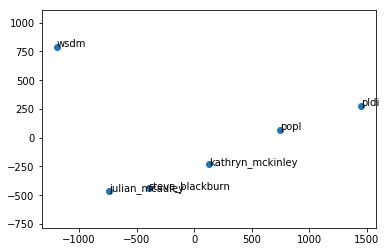

In [13]:
plot_pca(vec)

# PCA plot avg vectors

('original shape:   ', (6, 1619))
('transformed shape:', (6, 2))


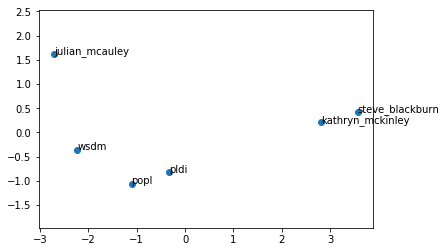

In [14]:
plot_pca(avg_vec)

In [49]:
cmap = plt.get_cmap("tab10")
def year_plot(namelist):
    plt.figure(figsize=(16,10))
    for idx, name in enumerate(namelist):
        pick = data[name]
        print((len(pick), number_of_venues))
        X = np.zeros((len(pick), number_of_venues))
        for i, v in enumerate(pick.values()):
            X[i] = get_vector(bag_of_venues, v)

        pca.fit(X)
        X_pca = pca.transform(X)
        print("original shape:   ", X.shape)
        print("transformed shape:", X_pca.shape)
    
        z = X_pca[:, 0]
        y = X_pca[:, 1]
        plt.scatter(z, y, color=cmap(idx))
        plt.axis('equal');
        for i, name in enumerate(pick.keys()):
            plt.annotate(name, (z[i],y[i]))
    plt.legend(namelist, loc='upper right')

# PCA Year plot (sum vectors)

(11, 1619)
('original shape:   ', (11, 1619))
('transformed shape:', (11, 2))
(12, 1619)
('original shape:   ', (12, 1619))
('transformed shape:', (12, 2))


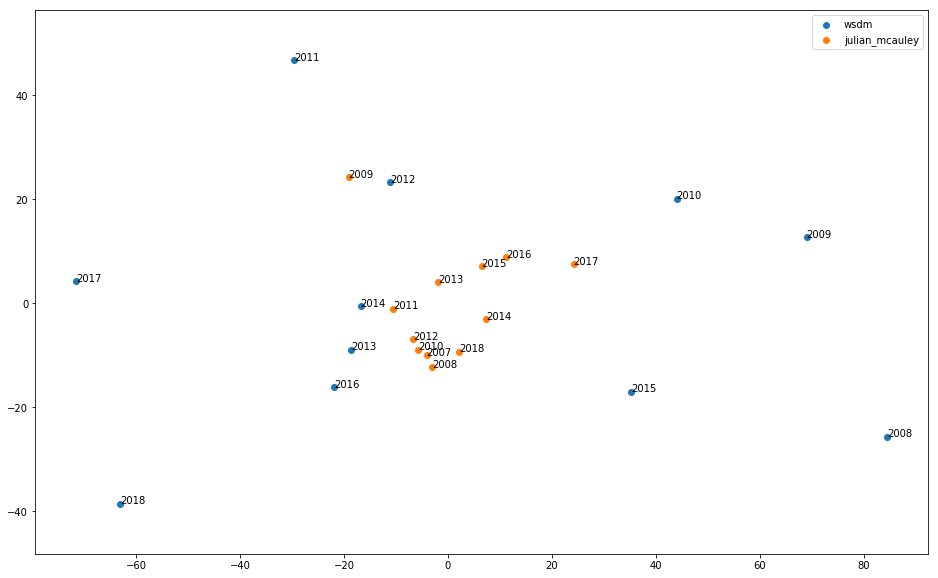

In [60]:
year_plot(["wsdm", "julian_mcauley"])

(11, 1619)
('original shape:   ', (11, 1619))
('transformed shape:', (11, 2))
(36, 1619)
('original shape:   ', (36, 1619))
('transformed shape:', (36, 2))
(12, 1619)
('original shape:   ', (12, 1619))
('transformed shape:', (12, 2))


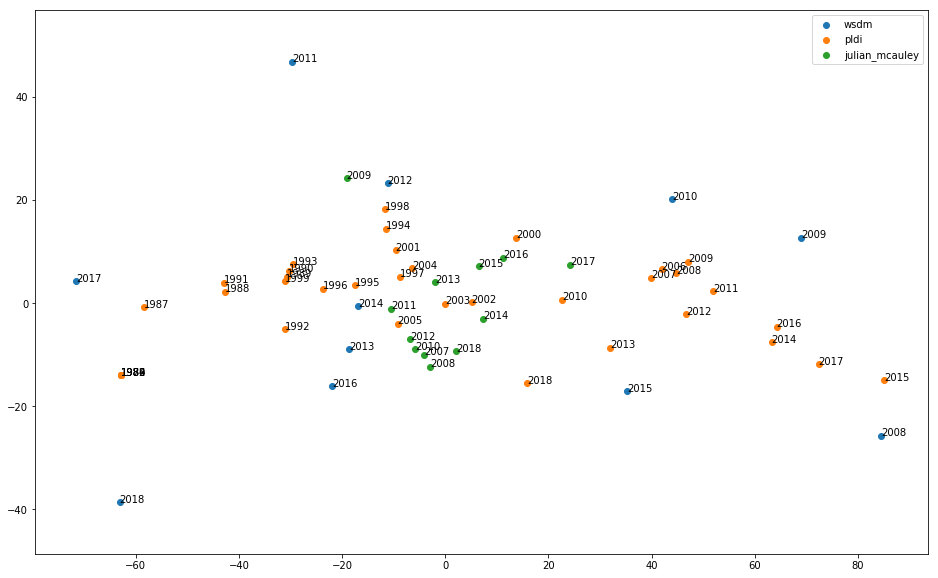

In [61]:
year_plot(["wsdm", "pldi", "julian_mcauley"])

(43, 1619)
('original shape:   ', (43, 1619))
('transformed shape:', (43, 2))
(36, 1619)
('original shape:   ', (36, 1619))
('transformed shape:', (36, 2))
(21, 1619)
('original shape:   ', (21, 1619))
('transformed shape:', (21, 2))


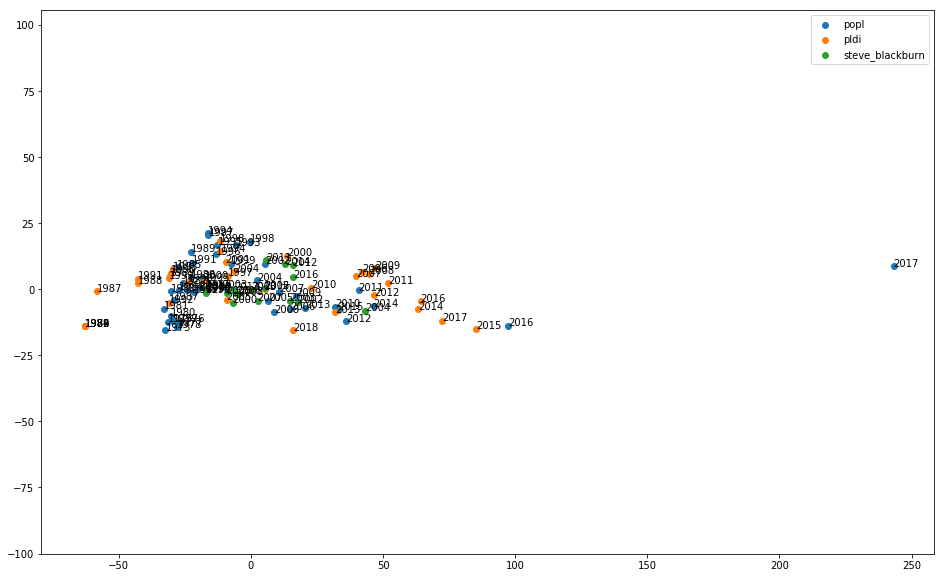

In [62]:
year_plot(["popl", "pldi", "steve_blackburn"])

(43, 1619)
('original shape:   ', (43, 1619))
('transformed shape:', (43, 2))
(36, 1619)
('original shape:   ', (36, 1619))
('transformed shape:', (36, 2))
(29, 1619)
('original shape:   ', (29, 1619))
('transformed shape:', (29, 2))


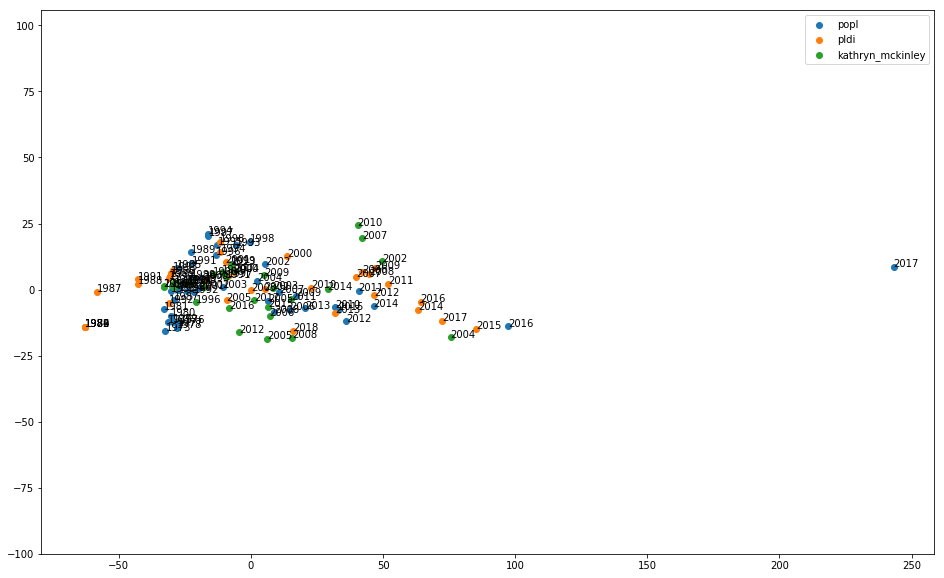

In [63]:
year_plot(["popl", "pldi", "kathryn_mckinley"])

(36, 1619)
('original shape:   ', (36, 1619))
('transformed shape:', (36, 2))
(21, 1619)
('original shape:   ', (21, 1619))
('transformed shape:', (21, 2))


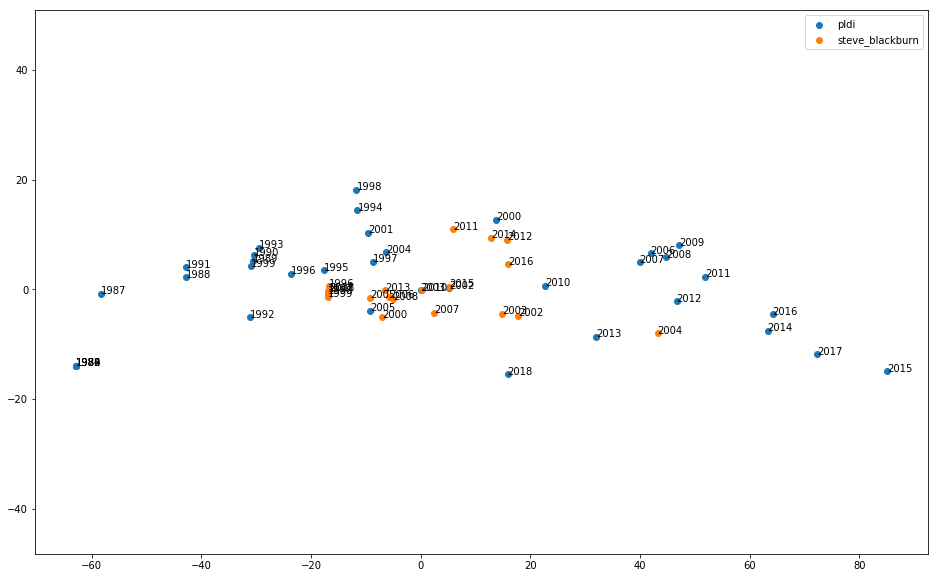

In [54]:
year_plot(["pldi", "steve_blackburn"])

(43, 1619)
('original shape:   ', (43, 1619))
('transformed shape:', (43, 2))
(36, 1619)
('original shape:   ', (36, 1619))
('transformed shape:', (36, 2))
(11, 1619)
('original shape:   ', (11, 1619))
('transformed shape:', (11, 2))


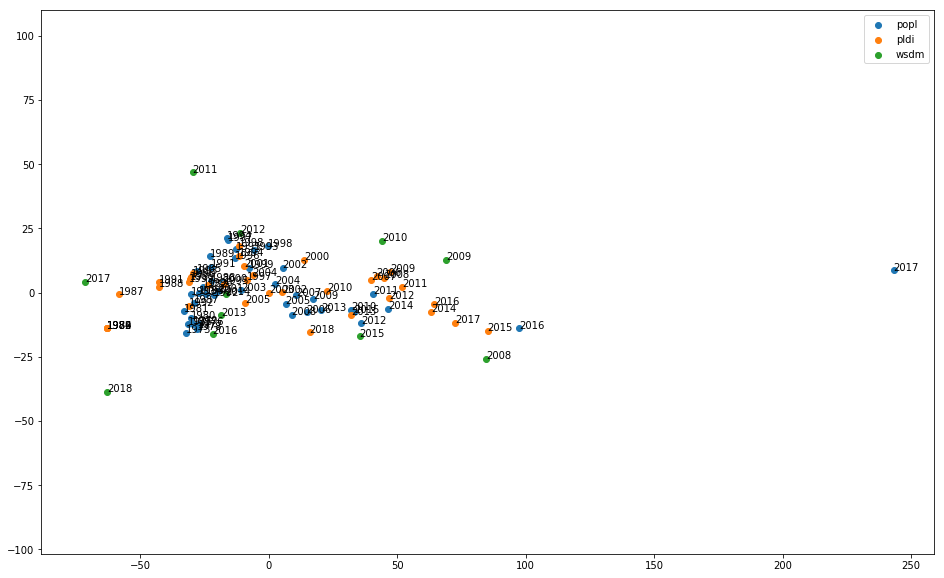

In [64]:
year_plot(["popl", "pldi", "wsdm"])

(11, 1619)
('original shape:   ', (11, 1619))
('transformed shape:', (11, 2))
(21, 1619)
('original shape:   ', (21, 1619))
('transformed shape:', (21, 2))


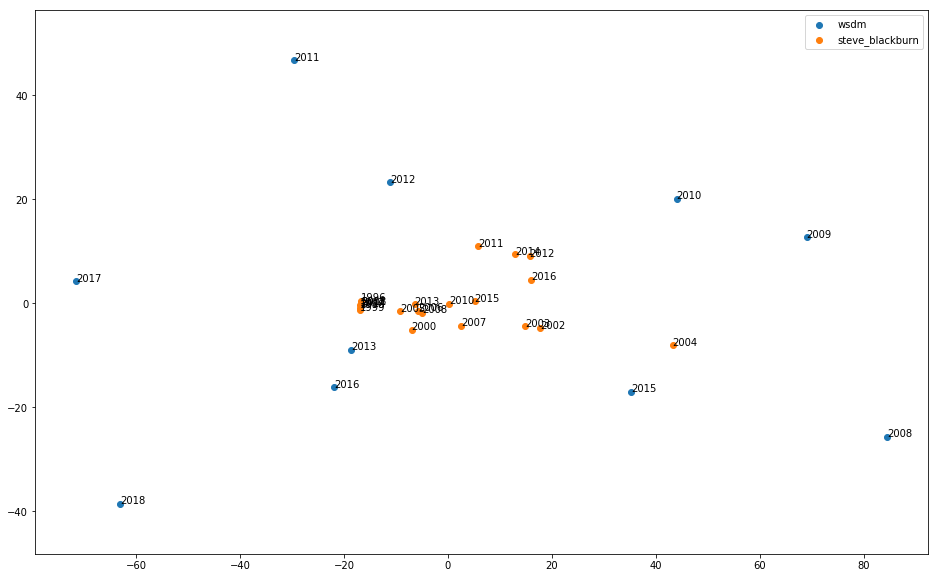

In [65]:
year_plot(["wsdm", "steve_blackburn"])